In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import numpy as np

## Carregar dados

In [2]:
df_countries = pd.read_csv('./dataset/countries.csv', sep=';', decimal=',')

In [3]:
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          165 non-null    object 
 1   child_mort       165 non-null    float64
 2   exports          165 non-null    float64
 3   health           165 non-null    float64
 4   imports          165 non-null    float64
 5   income           165 non-null    int64  
 6   inflation        165 non-null    float64
 7   life_expec       165 non-null    float64
 8   total_fer        165 non-null    float64
 9   gdpp             165 non-null    int64  
 10  income_category  165 non-null    object 
dtypes: float64(7), int64(2), object(2)
memory usage: 14.3+ KB


In [4]:
df_countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,income_category
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Low income
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Upper middle income
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Lower middle income
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Lower middle income
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,High income


## EDA

### Análise Univariada

In [5]:
# Estatísticas das variáveis
df_countries.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,38.567273,41.193327,6.825576,46.999793,17183.412121,7.585612,70.505455,2.959818,13011.963636
std,40.480851,27.560749,2.759425,24.233083,19389.968166,10.198185,8.935045,1.518166,18428.279743
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,7.900000,23.800000,4.930000,30.400000,3340.000000,1.770000,65.300000,1.800000,1310.000000
50%,19.700000,35.000000,6.320000,43.300000,9940.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.200000,51.400000,8.650000,58.900000,22900.000000,10.600000,76.800000,3.910000,14600.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
# Distribuição da variável income_category
percentual_income_category = df_countries.value_counts('income_category') / len(df_countries) * 100
px.bar(percentual_income_category, color=percentual_income_category.index)

In [7]:
# Distribuição da variável income
px.histogram(df_countries['income'], title='Histograna da variável income')

In [8]:
# Distribuição da variável GDPP (PIB per capita)
px.histogram(df_countries['gdpp'], title='Histograna da variável GDPP')

In [9]:
# Distribuição da variável inflação
px.histogram(df_countries['inflation'], title='Histograna da variável inflation')

In [10]:
# Distribuição da variável Life Expectation
px.histogram(df_countries['life_expec'], title='Histograna da variável life_expec')

### Análise Bivariada

In [11]:
# Plot de Distribuição (BoxPlot) por income e income_category
px.box(df_countries, x='income', y='income_category',color='income_category',
       orientation='h',hover_data=['country'])

In [12]:
# Plot de Distribuição (BoxPlot) por inflation e income_category
px.box(df_countries, x='inflation', y='income_category',color='income_category',
       orientation='h',hover_data=['country'])

In [13]:
# Plot de Distribuição (BoxPlot) por life_expec e income_category
px.box(df_countries, x='life_expec', y='income_category',color='income_category',
       orientation='h',hover_data=['country'])

In [15]:
# Scatterplot de income e GDPP
px.scatter(df_countries, x='income',y='gdpp',color='income_category',hover_data=['country'])

In [17]:
# Gerar matroz de correlação
matriz_corr_countries = df_countries.corr(numeric_only=True)

<Axes: >

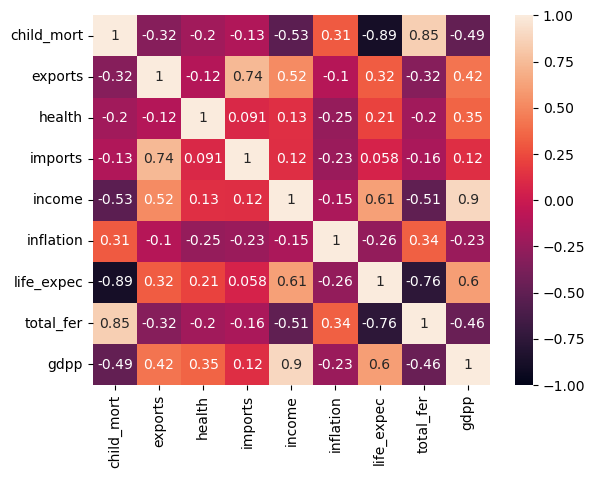

In [18]:
sns.heatmap(matriz_corr_countries,vmin=-1,vmax=1,annot=True)

## Treinar o Algoritmo PCA

In [19]:
# Selecionar as colunas para PCA
X = df_countries.copy()

# Remover colunas desnecessárias
X.drop(columns=['country', 'income_category'], axis=1, inplace=True)

In [20]:
# Separar variáveis quantitativas
numeric_features = ['child_mort', 'exports','health','imports', 'income',
                    'inflation', 'life_expec','total_fer','gdpp']

In [21]:
numeric_transformer = StandardScaler()

In [22]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer,numeric_features)
    ]
)


In [23]:
# Transformar os dados

X_transformed = preprocessor.fit_transform(X)

In [25]:
X_transformed.shape, X_transformed

((165, 9),
 array([[ 1.27936799, -1.13524796,  0.2742313 , ..., -1.6059239 ,
          1.88970656, -0.67813658],
        [-0.54431031, -0.48015711, -0.10017109, ...,  0.65049307,
         -0.86538974, -0.48561903],
        [-0.27918316, -0.10166017, -0.96529507, ...,  0.67294498,
         -0.04612849, -0.46548008],
        ...,
        [-0.37829611,  1.12117608,  0.00524318, ...,  0.29126251,
         -0.66718138, -0.63693336],
        [ 0.43938573, -0.40736924, -0.59816262, ..., -0.33739098,
          1.12990782, -0.63693336],
        [ 1.1034425 , -0.15261168, -0.34007942, ..., -2.07741401,
          1.61221484, -0.62876892]], shape=(165, 9)))

In [26]:
# Matriz de Covariância
np.cov(X_transformed)

array([[ 1.28101845, -0.30929073, -0.13299078, ..., -0.31162981,
         0.6038062 ,  1.11986219],
       [-0.30929073,  0.19023088,  0.05718309, ...,  0.14855132,
        -0.14287309, -0.40453184],
       [-0.13299078,  0.05718309,  0.3368898 , ...,  0.03260987,
         0.28911912, -0.02412952],
       ...,
       [-0.31162981,  0.14855132,  0.03260987, ...,  0.5954005 ,
        -0.08211639, -0.23881978],
       [ 0.6038062 , -0.14287309,  0.28911912, ..., -0.08211639,
         0.71221987,  0.6856765 ],
       [ 1.11986219, -0.40453184, -0.02412952, ..., -0.23881978,
         0.6856765 ,  1.231984  ]], shape=(165, 165))

In [27]:
# Crar modelo PCA

modelo_pca = PCA(n_components=3)

In [29]:
# Executar PCA
X_pca = modelo_pca.fit_transform(X_transformed)

In [30]:
# Gerar um dataframe com base nos componentes principais
df_pca = pd.DataFrame(X_pca, columns=['PC1','PC2','PC3'])
df_pca.head()

,PC1,PC2,PC3
0,-2.898491,0.043830,-0.674704
1,0.435969,-0.602095,-0.336181
2,-0.294489,-0.393013,1.237849
3,-2.941128,1.746346,1.498419
4,1.038913,0.117437,-0.255625


In [31]:
# Incluir componentes principais no dataframe original
df_countries['PC1'] = df_pca['PC1']
df_countries['PC2'] = df_pca['PC2']
df_countries['PC3'] = df_pca['PC3']

In [32]:
df_countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,income_category,PC1,PC2,PC3
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Low income,-2.898491,0.043830,-0.674704
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Upper middle income,0.435969,-0.602095,-0.336181
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Lower middle income,-0.294489,-0.393013,1.237849
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Lower middle income,-2.941128,1.746346,1.498419
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,High income,1.038913,0.117437,-0.255625


## Visualizar Resultados

In [37]:
# Autovalores
autovetores = modelo_pca.explained_variance_

# Autovetores
autovalores = modelo_pca.components_

print(f'Autovetores: {autovetores}')
print('=' * 90)
print(f'Autovalores: {autovalores}')

Autovetores: [4.18194258 1.55676483 1.15683401]
Autovalores: [[-0.41944537  0.28242091  0.15068193  0.16069962  0.39721431 -0.20064752
   0.42542863 -0.40370133  0.39213733]
 [ 0.18639458  0.61906392 -0.26537269  0.6623149   0.03301443  0.03814569
  -0.21355639  0.15172601 -0.04196516]
 [-0.02457745  0.11382205 -0.57151155 -0.33939771  0.32266099  0.63616571
   0.11811594  0.02417555  0.14584745]]


In [39]:
# Mostrar Chart 3D com os componentes principais
fig = px.scatter_3d(df_countries,x='PC1',y ='PC2', z='PC3', color='income_category',
                    title='Visualização PCA', width=800, height=600, hover_data=['country'])

fig.show()

In [40]:
# Reconstruir os dados com base no PCA
X_recovered = modelo_pca.inverse_transform(X_pca)

In [41]:
# Visualizar Recovered
X_recovered.shape, X_recovered

((165, 9),
 array([[ 1.24051071, -0.86825694, -0.06278059, ..., -1.32215438,
          1.1604634 , -1.23684957],
        [-0.28682977, -0.28787365,  0.41760377, ...,  0.27434638,
         -0.27548195,  0.14719535],
        [ 0.01984344, -0.18557564, -0.64752426, ...,  0.10485603,
          0.08918105,  0.08154978],
        ...,
        [ 0.06178006,  0.96128084, -0.10287206, ..., -0.12810115,
          0.00487659,  0.08490176],
        [ 0.75967769, -0.43601395, -0.92852836, ..., -0.66251251,
          0.7873269 , -0.57577658],
        [ 1.28114026, -0.48486169, -0.69796675, ..., -1.2880174 ,
          1.23173122, -1.10450882]], shape=(165, 9)))

In [42]:
# Calcular o erro de reconstrução
reconstruction_error = mean_squared_error(X_transformed, X_recovered)
print(f'Erro de reconstrução: {reconstruction_error}')

Erro de reconstrução: 0.23847219349860976


## Salvar Modelo

In [43]:
import joblib

joblib.dump(modelo_pca, './modelo_pca_countries.pkl')

joblib.dump(preprocessor, './preprocessor_pca_countries.pkl')

['./preprocessor_pca_countries.pkl']